## Notebook Set Up

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import random

RAND_SEED = 49
random.seed(RAND_SEED)

In [ ]:
# import test datasets
header_body_df = pd.read_csv('header_body_test.csv')
headings_df = pd.read_csv('headings_test.csv')

In [ ]:
# these packages need to be installed
!pip install -r https://raw.githubusercontent.com/mitramir55/PassivePy/main/PassivePyCode/PassivePySrc/requirements_lg.txt
!pip install PassivePy==0.2.2

!pip install language-tool-python
!pip install yake

## Setting up Llama-3

In [ ]:
# install langsmith packages
!pip install -U langchain
!pip install -U langsmith
!pip install langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.0/990.0 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.5/373.5 kB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.2 MB/s eta 0:00:00


In [ ]:
# install llama packages
!pip install transformers torch accelerate
import transformers
import torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
# clear cuda cache
torch.cuda.empty_cache()
torch.cuda.mem_get_info()

(15727656960, 15835660288)

In [ ]:
# log in to hugging face
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
# load llama-3 8b
model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

# set model pipeline
pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs= {"torch_dtype": torch.bfloat16,
                    "low_cpu_mem_usage": True,},
    device_map="auto",
)

config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
## define function to receive llama response
from langsmith import traceable

terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

@traceable(run_type="llm") # trace runs of this function with langsmith
def get_llama_response(user_prompt):

# defining system prompt, leave user prompt open
  messages = [
    {"role": "system", "content": "You are an expert in technical writing and document design. You are contracted by a retail bank to check over some of their customer-facing personal banking documents."},
    {"role": "user", "content": user_prompt}
  ]

# chat template
  prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True)

# define llama parameters
  outputs = pipeline(
    prompt,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.2,
    top_p=0.9,
    repetition_penalty=1.1,
  )
  response = outputs[0]["generated_text"][len(prompt):] #clean up outputs
  return(response)

## 1. Content: Relevancy

In [ ]:
# define content_df
santander_content_df = header_body_df[header_body_df['bank'] == 'santander_l'].drop('bank', axis=1) # this was part of a larger dataset
santander_content_df.reset_index(drop=True, inplace=True)
santander_content_df.dropna(how='any', inplace = True)
santander_content_df[['header', 'body']] = santander_content_df[['header', 'body']].astype(str)

**Validation Function**

In [ ]:
# install necessary packages
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from gensim.corpora import Dictionary
from gensim.models import LdaModel

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
content_check = santander_content_df.copy()

In [ ]:
# preprocessing- tokenization, lemmatisation and stopword removal
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return filtered_tokens

In [ ]:
## topic modelling and similarity scoring
content_check['header_tokens'] = content_check['header'].apply(preprocess_text)
content_check['body_tokens'] = content_check['body'].apply(preprocess_text)

# create dictionary and corpus- use bag of words
dictionary = Dictionary(content_check['body_tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in content_check['body_tokens']]

# train LDA on body text
num_topics = 1 # there should only be one key topic
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# function to extract keywords from LDA topics
def get_lda_keywords(lda_model, num_words=5): # arbitrarily set to 5
    topic_keywords = []
    for i in range(lda_model.num_topics):
        topic_words = lda_model.show_topic(i, topn=num_words)
        keywords = [word for word, _ in topic_words]
        topic_keywords.append(keywords)
    return topic_keywords

body_topic_keywords = get_lda_keywords(lda_model)

# calculate similarity for each row- essentially using jaccard similarity
def calculate_similarity(header_tokens, body_keywords):
    header_set = set(header_tokens)
    common_words = header_set.intersection(body_keywords)
    similarity_score = len(common_words) / len(header_set) if len(header_set) > 0 else 0.0
    return similarity_score

similarities = []
for index, row in content_check.iterrows():
    similarity_score = calculate_similarity(row['header_tokens'], row['body_tokens'])
    similarities.append(similarity_score)

content_check['topic_word_similarity'] = similarities

In [ ]:
# turn to binary scoring with a threshold of over 0
content_check['N_relevance'] = content_check['topic_word_similarity'].apply(lambda x: 0 if x > 0 else 1)

In [ ]:
# copy this to the content_df
santander_content_df['N_relevance'] = content_check['N_relevance']
santander_content_df['N_relevance_notes'] = content_check['topic_word_similarity']

In [ ]:
santander_content_df

,header,body,N_relevance,N_relevance_notes
0,What is a 'Personal Loan?',A personal loan from Santander is a loan for a...,0,1.000000
1,Put Simply,It's money that you borrow from us. The amount...,1,0.000000
2,What checks do you need to do for me to get a ...,"If you wish to apply for a loan then we will,...",0,0.166667
3,Put Simply,To apply for a personal loan you must agree to...,1,0.000000
4,How much do I have to pay under the agreement,You will need to make repayments every month w...,0,0.666667
5,Put Simply,You pay a fixed amount each month (made up of ...,1,0.000000
6,What are the consequences if I do not keep up ...,If you fail to make a repayment on the date it...,0,0.333333
7,Put Simply,"If you miss a repayment, you’ll be charged int...",1,0.000000
8,Are there any features of the agreement which ...,Before applying for a Personal Loan you should...,0,0.428571
9,Put Simply,We’ve prepared a document for you called ‘Pre-...,1,0.000000


**LLM Prompting**

In [ ]:
# examples for the prompt
example_yes = """Header: How much can you borrow?
Body: The total amount you can borrow on your card is called the credit limit. You can only borrow up to your credit limit - no more. We’ll tell you your credit limit once we’ve opened your account. If we change it later, we’ll tell you before we make the change."""
example_answer_yes = "Yes, the header asks 'how much can [the customer] can borrow', which the body text provides an answer to (up to their credit limit)."

example_no = """Header: 6.2 Cashback amount and categories
Body: If you apply for a personal loan we will conduct a credit check on you. It’s very important to provide accurate information in your application – we might decline your application based on the results of your credit check, or if you have provided false information."""
example_answer_no = "No, the header introduces 'cashback amount and categories' while the body paragraph is focused on an unrelated topic of credit checks for personal loans."

In [ ]:
# check which dataset am i using
content_df = santander_content_df

In [ ]:
# iterate over rows and prompt one-by-one

responses = []

for index, row in content_df.iterrows():
    prompt = f"""Given this pair of header and body text, can you check if the heading matches the body text? Because this is an excerpt from a larger document, please use logic to make inferences where necessary. Don't evaluate the heading on anything else.
    Answer in Yes/ No format with a short justification. Here are two examples to help you:

    \nContext: {example_yes}
    Answer: {example_answer_yes}

    \nContext: {example_no}
    Answer: {example_answer_no}

    \nNow, please evaluate this heading-body pair:
    Header: {row['header']}
    Body: {row['body']}"""

    response = get_llama_response(prompt)

    # validate output
    answer_start = response.lower().find('answer:')
    if answer_start != -1:
        answer_text = response[answer_start + len('answer:'):].strip()
        try: # error handling
            if answer_text.lower().startswith('no') and content_df['N_relevance'].iloc[index] == 0:
              # Prompt the LLM to retry
              retry_prompt = f"""There is a chance your previous response may have been incorrect. Please check again.
              This time consider how the connection between the body and header may be more implicit than explicit.
              Does the heading match the body text in this heading-body pair:
              Header: {row['header']}
              Body: {row['body']}
              \nAnswer in Yes/ No format with a short justification. Don't evaluate the heading on anything else."""

              response = get_llama_response(retry_prompt)
        except Exception as e:
            print(f"Error processing row {index}: {e}")
            continue

    responses.append(response)

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_to

In [ ]:
# create a new column in the original dataframe with the responses
santander_content_df['L_relevance_notes'] = responses
santander_content_df.head()

,header,body,N_relevance,N_relevance_notes,L_relevance_notes
0,What is a 'Personal Loan?',A personal loan from Santander is a loan for a...,0,1.000000,"Answer: Yes\n\nJustification: The header ""What..."
1,Put Simply,It's money that you borrow from us. The amount...,1,0.000000,"Answer: No\n\nJustification: The header ""Put S..."
2,What checks do you need to do for me to get a ...,"If you wish to apply for a loan then we will,...",0,0.166667,"No\n\nThe heading asks about ""checks"" needed t..."
3,Put Simply,To apply for a personal loan you must agree to...,1,0.000000,"Answer: No\n\nJustification: The header ""Put S..."
4,How much do I have to pay under the agreement,You will need to make repayments every month w...,0,0.666667,Answer: Yes\n\nJustification: The header asks ...


In [ ]:
# turns results into binary 1 or 0 labels
def label_relevance(text):
  text = text.lower()
  if text.startswith('answer: yes') or text.startswith('yes'):
    return 0
  elif text.startswith('no') or text.startswith('answer: no'):
    return 1
  else:
    return None # handle cases that don't start with yes or no

santander_content_df['L_relevance'] = santander_content_df['L_relevance_notes'].apply(label_relevance)

## 2. Content: Keywords

In [ ]:
# we need the title that was previously dropped temporarily
santander_keywords = header_body_df[header_body_df['bank'] == 'santander_l'].drop('bank', axis=1)
santander_keywords.reset_index(drop=True, inplace=True)
santander_keywords[['header', 'body']] = santander_content_df[['header', 'body']].astype(str)

In [ ]:
# install necessary packages
import yake
import re

[nltk_data] Downloading package wordnet to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 531.9 kB/s eta 0:00:00


In [ ]:
# function to extract keywords from df
def extract_keywords_df(df, window_size, num_keywords):

    # take the entire document
    all_body = ' '.join(df['body'])
    document = ' '.join(preprocess_text(all_body))

    # initialise YAKE keyword extractor
    kw_extractor = yake.KeywordExtractor(lan="en",
                                         n= 1,
                                         windowsSize=window_size,
                                         top=num_keywords)

    # extract keywords
    extracted_keywords = kw_extractor.extract_keywords(document)
    keywords = [keyword for keyword, score in extracted_keywords]

    # words to be excluded that add no additional meaning
    excluded_keywords = ['barclays', 'hsbc', 'santander', 'natwest', 'lloyds', 'customer',
                         'banking', 'personal', 'bank', 'content', 'information', 'financial']

    # remove words that appear in the title
    title_keywords = preprocess_text(df['header'][0])
    excluded_keywords = excluded_keywords + title_keywords

    # keywords to be included- based on list sourced online
    included_keywords = ['aer', 'apr', 'bacs', 'ear', 'ftse', 'balance', 'transfer',
                         'rate', 'draft', 'borrow', 'cheque', 'bounce', 'card',
                         'protect', 'security', 'code', 'rate', 'credit', 'interest',
                         'debit', 'deposit', 'dormant', 'guarantee', 'pay', 'payment', 'repay', 'repayment',
                         'estate', 'fixed', 'online', 'income', 'annual', 'gross', 'hvr', 'inheritance',
                         'theft', 'access', 'save', 'savings', 'internet', 'isa', 'ltv', 'long-term',
                         'short-term', 'portability', 'net', 'charge', 'oeic', 'offset', 'overdraft',
                         'limit', 'extension', 'pension', 'remortgage', 'bond', 'secured',
                         'certificate', 'standing', 'order', 'variable', 'statement', 'term', 'transfer',
                         'track', 'tax', 'tax-free', 'cost', 'international', 'loan', 'business']

    # filter
    keywords_modified = [keyword for keyword in keywords if keyword.lower() not in excluded_keywords]

    matched_keywords_list = []
    matched_keywords_count = []

    # iterate over each heading to find matched keywords
    for heading in df['header']:
        heading_filtered_str = ' '.join(preprocess_text(heading))

        pattern = r'\b(?:{})\b'.format('|'.join(map(re.escape, keywords_modified + included_keywords)))
        matched_keywords = re.findall(pattern, heading_filtered_str)

        # filter out excluded keywords
        matched_keywords = [keyword for keyword in matched_keywords if keyword not in excluded_keywords]

        matched_keywords_list.append(', '.join(matched_keywords) if matched_keywords else '')
        matched_keywords_count.append(0 if matched_keywords else 1)

    # Add matched keywords as a new column in the DataFrame
    df['N_keywords_notes'] = matched_keywords_list
    df['N_keywords'] = matched_keywords_count

    return df

In [ ]:
extract_keywords_df(santander_keywords, 1, 100) # use same parameters as training
santander_keywords.head()

,header,body,N_keywords_notes,N_keywords
0,Personal Loan,nan,,1
1,Pre-Contractual explanation,nan,,1
2,What is a 'Personal Loan?',A personal loan from Santander is a loan for a...,,1
3,Put Simply,It's money that you borrow from us. The amount...,,1
4,What checks do you need to do for me to get a ...,"If you wish to apply for a loan then we will,...",check,0


In [ ]:
# save content to csv file
santander_content_df = pd.merge(santander_keywords, santander_content_df, how = 'inner', on='header')
santander_content_df.to_csv('santander_content.csv')

## 3. Language: Length

In [ ]:
# obtain headings dataset
santander_headings_df = headings_df[headings_df['bank'] == 'santander_l'].drop('bank', axis=1)
santander_headings_df.reset_index(drop=True, inplace=True)
santander_headings_df.drop(0, inplace = True) # drop title
santander_headings_df.reset_index(drop=True, inplace=True)
santander_headings_df

,level,header
0,0,Pre-Contractual explanation
1,1,What is a 'Personal Loan?'
2,1,Put Simply
3,1,What checks do you need to do for me to get a ...
4,1,Put Simply
5,1,How much do I have to pay under the agreement
6,1,Put Simply
7,1,What are the consequences if I do not keep up ...
8,1,Put Simply
9,1,Are there any features of the agreement which ...


In [ ]:
## clean up heading by removing list identifications
import re

def remove_patterns(df):
    pattern = r'^\d+\. |\d+\) |\(\w\) |\b[A-Z]\b |\b[A-Z]\d+ |\b\d+\b '
    df['header'] = df['header'].apply(lambda x: re.sub(pattern, '', x))
    return df

In [ ]:
## function to count words in heading
def header_count_df(df):

    wordcount = []
    wordcount_check = []

    for heading in df['header']:
      # set headers that are called contents or accessibility to okay by default
      if heading == 'Contents' or heading == 'Accessibility':
        wordcount.append(0)
        wordcount_check.append(0)
      else:
        num_words = len(heading.split())
        wordcount.append(num_words)
        wordcount_check.append(0 if (num_words >= 3 and num_words <= 14) else 1)

    df['N_length_notes'] = wordcount
    df['N_length'] = wordcount_check

    return df

In [ ]:
# execute on df
remove_patterns(santander_headings_df)
header_count_df(santander_headings_df)

,level,header,N_length_notes,N_length
0,0,Pre-Contractual explanation,2,1
1,1,What is a 'Personal Loan?',5,0
2,1,Put Simply,2,1
3,1,What checks do you need to do for me to get a ...,16,1
4,1,Put Simply,2,1
5,1,How much do have to pay under the agreement,9,0
6,1,Put Simply,2,1
7,1,What are the consequences if do not keep up wi...,11,0
8,1,Put Simply,2,1
9,1,Are there any features of the agreement which ...,18,1


## 4. Language: Grammar

**Validation Function**

In [ ]:
# install packages
import language_tool_python

In [ ]:
# define function to check grammar using the tool
def check_grammar(df):
  tool = language_tool_python.LanguageTool('en-UK')

  grammar_errors = []
  grammar_check = []

  for heading in df['header']:
    matches = tool.check(heading)
    if len(matches) > 0:
      error_ids = [match.ruleId for match in matches]
      grammar_errors.append(error_ids)
      grammar_check.append(1)
    else:
      grammar_errors.append([])
      grammar_check.append(0)

  df['N_grammar_notes'] = grammar_errors
  df['N_grammar'] = grammar_check

  return df

In [ ]:
# execute function
check_grammar(santander_headings_df)

,level,header,N_length_notes,N_length,N_grammar_notes,N_grammar
0,0,Pre-Contractual explanation,2,1,[],0
1,1,What is a 'Personal Loan?',5,0,[],0
2,1,Put Simply,2,1,[],0
3,1,What checks do you need to do for me to get a ...,16,1,[],0
4,1,Put Simply,2,1,[],0
5,1,How much do have to pay under the agreement,9,0,[],0
6,1,Put Simply,2,1,[],0
7,1,What are the consequences if do not keep up wi...,11,0,[IF_VB],1
8,1,Put Simply,2,1,[],0
9,1,Are there any features of the agreement which ...,18,1,[],0


**LLM Prompting**

In [ ]:
# base prompt
headings = santander_headings_df['header']

grammar_prompt = f"""Please look through some headers and check for grammatical errors.
Only check for grammatical correctness and nothing else (e.g. do not evaluate how good of a header it is).
Some things to look out for include incorrect punctuation, subject/ verb agreements, comma usage, homophones, spelling and capitalisation.
Please provide a bulleted list of the errors and the headings and index number they are found in.
Here are two example outputs to help you:
* Header 1: 'Account benefits at glance' - The noun phrase glance seems to be missing a determiner. Consider adding the article 'a'.
* Header 5: 'Things you need to know about our serveces' - The word 'services' is misspelt.

\nNow please check these headers: {headings}"""

response = get_llama_response(grammar_prompt)
print(response)

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


After reviewing the provided headers, I've identified the following grammatical errors:

• Header 0: 'Pre-Contractual explanation' - The hyphenation is incorrect; it should be "pre-contractual" without the space.

• Header 3: 'What checks do you need to do for me to get a...' - The sentence structure is unclear and lacks a main verb. It would be better rephrased as "What checks do we conduct to approve your loan application?"

• Header 7: 'What are the consequences if do not keep up wi...' - There's a typo in "wi"; it should be "with". Additionally, the sentence could be improved by using the correct form of the verb "keep up with" instead of "do not keep up wi".

• Header 9: 'Are there any features of the agreement which...' - The sentence is incomplete and lacks a clear question or statement. It would be better rephrased as "Are there any special features of this agreement that you should know about?"

• Header 11: 'Your Right to Cancel (and repay early)' - The title case is inconsis

In [ ]:
## extract index from LLM output
import re
numbers = re.findall(r"Header (\d+):", response)
numbers = [int(i) for i in numbers]
print("Errors found from LLM:", numbers)

Errors found from LLM: [0, 3, 7, 9, 11]


In [ ]:
## extract index from package df
indices = santander_headings_df.index[santander_headings_df['N_grammar'] == 1].tolist()
print("Errors found from Package:", indices)

Errors found from LLM: []
Errors found from Package: [7]


In [ ]:
## finding the index
overlap_index = list(set(indices) & set(numbers))
non_index = list(set(numbers) - set(overlap_index))
missed_index = list(set(indices) - set(overlap_index))
print("Extra errors:", non_index)
print("Missed errors:", missed_index)

Extra errors: [0, 9, 3, 11]
Missed errors: []


In [ ]:
# we only have a non_grammar df
non_grammar = santander_headings_df.loc[non_index, 'header']
non_grammar

0                           Pre-Contractual explanation
3     What checks do you need to do for me to get a ...
9     Are there any features of the agreement which ...
11               Your Right to Cancel (and repay early)
Name: header, dtype: object

In [ ]:
# if we notice some incorrect identifications
grammar_prompt = f"""There is a chance you may have incorrectly identified some grammatical errors.
Please look through these headers again and check for grammatical errors: {non_grammar}
\nRemember to only check for grammatical correctness and nothing else (e.g. do not evaluate how good of a header it is).
Some things to look out for include incorrect punctuation, subject/ verb agreements, comma usage, homophones, spelling and capitalisation.
Note that these are headers and not necessarily full sentences, so offer some leniency for things that are generally considered acceptable but may not be completely accurate."""

response = get_llama_response(grammar_prompt)
print(response)

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Based on my review, I found the following potential grammatical errors:

* "Pre-Contractual explanation" - This header appears to be a noun phrase, but it's missing an article ("a" or "the") before "pre-contractual". It would be more grammatically correct as "A pre-contractual explanation" or "The pre-contractual explanation".
* "What checks do you need to do for me to get a..." - This header seems to be a question, but it's missing a verb. It could be rephrased as "What checks must we complete for you to receive..." or "What checks do we need to perform for you to obtain...".

The other two headers appear to be grammatically correct.

Please note that, as per your instructions, I've focused solely on grammatical correctness and haven't evaluated the clarity or effectiveness of the headers.


In [ ]:
# if we notice some missed errors
grammar_prompt = f"""There is a chance you may have missed some grammatical errors.
Please look through these headers again and check for grammatical errors: {not_grammar}
\nSome things to look out for include incorrect punctuation, subject/ verb agreements, comma usage, homophones, spelling and capitalisation."""

response = get_llama_response(grammar_prompt)
print(response)

## 5. Language: Passive

In [ ]:
from PassivePySrc import PassivePy
spacy_model = "en_core_web_lg"
passivepy = PassivePy.PassivePyAnalyzer(spacy_model)

# passive detection function
def passive_detection_df(df):
  df_detected_c = passivepy.match_corpus_level(df, column_name='header', n_process = 1,
                                              batch_size = 32, add_other_columns=True,
                                              truncated_passive=False, full_passive=False)

  df['N_passive'] = df_detected_c['binary']
  df['N_passive_notes'] = df_detected_c['all_passives']
  return df

In [ ]:
passive_detection_df(santander_headings_df)
santander_headings_df.head()

Detecting Sentences...


  0%|          | 0/13 [00:00<?, ?it/s]

Total number of sentences = 13
Starting to find passives...


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

,level,header,N_length_notes,N_length,N_grammar_notes,N_grammar,N_passive,N_passive_notes
0,0,Pre-Contractual explanation,2,1,[],0,0,[]
1,1,What is a 'Personal Loan?',5,0,[],0,0,[]
2,1,Put Simply,2,1,[],0,0,[]
3,1,What checks do you need to do for me to get a ...,16,1,[],0,0,[]
4,1,Put Simply,2,1,[],0,0,[]


In [ ]:
santander_headings_df.to_csv('santander_language.csv', index=False)

## 6. Structure: Subheadings



In [ ]:
# import relevant dataframes and preprocess- normally this would be a different dataset but they are the same this time

santander_headings_df = headings_df[headings_df['bank'] == 'santander_l'].drop('bank', axis=1)
santander_headings_df.reset_index(drop=True, inplace=True)
santander_headings_df.drop(0, inplace = True)
santander_headings_df.reset_index(drop=True, inplace=True)
santander_headings_df

santander_headings_df['level'] = santander_headings_df['level'].replace({0: 'Main heading:', 1: 'Subheading:', 2: 'Sub-subheading:'})

In [ ]:
# turn df to text
def turn_to_text(df):
  df['combined'] = df['level'] + ' ' + df['header']
  output_string = '\n'.join(df['combined'].astype(str).tolist())
  return output_string

headings = turn_to_text(santander_headings_df)

In [ ]:
print(headings)

Main heading: Pre-Contractual explanation
Subheading: What is a 'Personal Loan?'
Subheading: Put Simply
Subheading: What checks do you need to do for me to get a personal loan with Santander
Subheading: Put Simply
Subheading: How much do I have to pay under the agreement
Subheading: Put Simply
Subheading: What are the consequences if I do not keep up with repayments?
Subheading: Put Simply
Subheading: Are there any features of the agreement which may operate in a manner which may adversely affect me?
Subheading: Put Simply
Subheading: Your Right to Cancel (and repay early)
Subheading: Put Simply


In [ ]:
# prompt to run
structure_prompt = f"""Here is an ordered list of headings from a document along with their classifications: {headings}
For each subheader and sub-subheader, please answer the following question in Yes/No format with a brief justification if No:
Is the heading clearly relevant to its corresponding parent heading? Don't grade main headings, just use them for context."""

response = get_llama_response(structure_prompt)

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


In [ ]:
print(response)

Here are my answers:

1. Subheading: What is a 'Personal Loan?' - YES
This subheading is directly related to the parent heading "Pre-Contractual explanation" as it provides essential information about what a personal loan is.

2. Subheading: Put Simply - NO
While this subheading claims to provide simpler language, it doesn't seem to be directly related to the previous subheading or the parent heading. It appears to be a redundant repetition rather than adding new content.

3. Subheading: What checks do you need to do for me to get a personal loan with Santander - YES
This subheading is relevant to the parent heading "Pre-Contractual explanation" as it provides important information about the requirements for getting a personal loan with Santander.

4. Subheading: Put Simply - NO
Similar to the previous instance, this subheading seems to be a redundant repetition rather than providing new content.

5. Subheading: How much do I have to pay under the agreement - YES
This subheading is rel

## Setting up Llava-Next

In [ ]:
import transformers
import requests
from PIL import Image
import torch
from transformers import AutoProcessor, LlavaNextForConditionalGeneration

In [ ]:
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0

In [ ]:
# quantisation configuation
from transformers import LlavaNextForConditionalGeneration, BitsAndBytesConfig

# specify how to quantize the model
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
)

In [ ]:
# load the model in half-precision
model = LlavaNextForConditionalGeneration.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf", quantization_config=quantization_config, device_map="auto")
processor = AutoProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")

config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.2k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/380M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
# define llava response function
from langsmith import traceable

@traceable(run_type="llm")
def get_llava_response(prompt, images):
  inputs = processor(text=prompt, images=images, padding=True, return_tensors="pt").to(model.device)
  generate_ids = model.generate(**inputs, max_new_tokens=1000)
  response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)
  print(response[0].split("[/INST]")[1].strip())

## 7. Design

In [ ]:
print(headings) # utilising the same text from subheadings

Main heading: Pre-Contractual explanation
Subheading: What is a 'Personal Loan?'
Subheading: Put Simply
Subheading: What checks do you need to do for me to get a personal loan with Santander
Subheading: Put Simply
Subheading: How much do I have to pay under the agreement
Subheading: Put Simply
Subheading: What are the consequences if I do not keep up with repayments?
Subheading: Put Simply
Subheading: Are there any features of the agreement which may operate in a manner which may adversely affect me?
Subheading: Put Simply
Subheading: Your Right to Cancel (and repay early)
Subheading: Put Simply


In [ ]:
# import images
page_1 = Image.open(image_url + 'santander_l_1.png')
page_2 = Image.open(image_url + 'santander_l_2.png')

In [ ]:
# prompt analysis on design
prompt= [f"""[INST] <image> <image> \n Use these image to detect the formatting of the headers in this document.
Here is the list of headers to look out for and their classifications: {headings}
Determine if the difference in the formatting is enough to distinguish between each heading class clearly. Consider things like font characteristics, colour, spacing, highlighting etc.
For each heading class, provide a 'Yes' or 'No' answer followed by a comma and a brief justification. Use this template:
1. Title -
2. Main headings -
3. Subheadings -
4. Sub-subheadings -
Only provide answers for heading classes that are present in the document. [/INST]""", """[INST] Now determine if the difference in the formatting between the subheadings and the body text is clearly distinguishable.
Answer with a 'Yes' or 'No' followed by a brief justification.[/INST]"""]

response = get_llava_response(prompt, images = [page_1, page_2])
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


1. Title -
2. Main headings - Yes, the main heading "Personal Loan" is distinct from the subheadings and sub-subheadings. It is larger, bold, and centrally aligned, making it stand out from the rest of the text.
3. Subheadings - Yes, the subheadings "What is a 'Personal Loan?'" and "Put Simply" are clearly distinguishable from the main heading and sub-subheadings. They are larger than the sub-subheadings and are bold, making them easily identifiable.
4. Sub-subheadings - Yes, the sub-subheadings "What checks do you need to do for me to get a personal loan with Santander" and "What are the consequences if I do not keep up with repayments?" are differentiated from the subheadings by their smaller size and lack of bolding. They are also distinct from the main heading and other subheadings.
5. Sub-sub-subheadings - No, there are no sub-sub-subheadings in this document.
None


## Final Evaluation

In [ ]:
# import updated datasets
santander_content = pd.read_csv(link + 'santander_content.csv')
santander_headings = pd.read_csv(link + 'santander_headings.csv')

In [ ]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# define function

def get_accuracy(df, human, machine):
  accuracy = accuracy_score(df[human], df[machine])
  precision = precision_score(df[human], df[machine])
  recall = recall_score(df[human], df[machine])
  cm = confusion_matrix(df[human], df[machine])

  print("Accuracy:", round(accuracy,4))
  print("Precision:", round(precision,4))
  print("Recall:", round(recall,4))

  labels = sorted(df[human].unique())
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot()
  plt.show()

Accuracy: 0.9167
Precision: 0.8571
Recall: 1.0


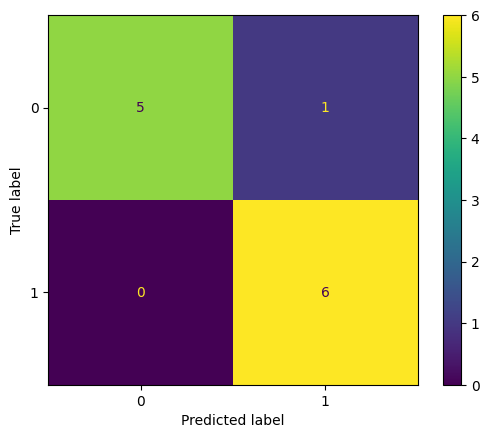

In [ ]:
# measure accuracy for content- relevance
get_accuracy(santander_content, 'H_relevance', 'L_relevance')

In [ ]:
# examine the incorrect label
santander_content[santander_content['H_relevance'] != santander_content['L_relevance']][['header', 'body', 'L_relevance_notes']]

,header,body,L_relevance_notes
2,What checks do you need to do for me to get a ...,"If you wish to apply for a loan then we will,...","No\n\nThe heading asks about ""checks"" needed t..."


Accuracy: 1.0
Precision: 1.0
Recall: 1.0


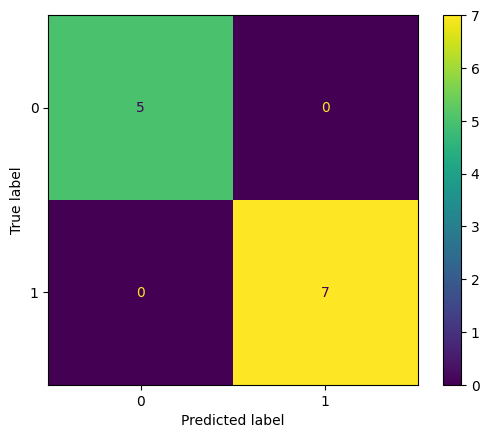

In [ ]:
# measure accuracy for content- keywords
get_accuracy(santander_content, 'H_keywords', 'N_keywords')

In [ ]:
santander_headings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   level            14 non-null     int64  
 1   header           14 non-null     object 
 2   H_length         13 non-null     float64
 3   N_length_notes   13 non-null     float64
 4   N_length         13 non-null     float64
 5   H_grammar        13 non-null     float64
 6   N_grammar_notes  13 non-null     object 
 7   N_grammar        13 non-null     float64
 8   L_grammar        13 non-null     float64
 9   L_grammar_notes  3 non-null      object 
 10  H_passive        13 non-null     float64
 11  N_passive        13 non-null     float64
 12  N_passive_notes  13 non-null     object 
 13  H_subheadings    13 non-null     float64
 14  L_subheadings    13 non-null     float64
 15  H_design         13 non-null     float64
 16  L_design         14 non-null     int64  
 17  L_design_notes   2

In [ ]:
santander_headings.dropna(subset=['H_length'], inplace = True)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


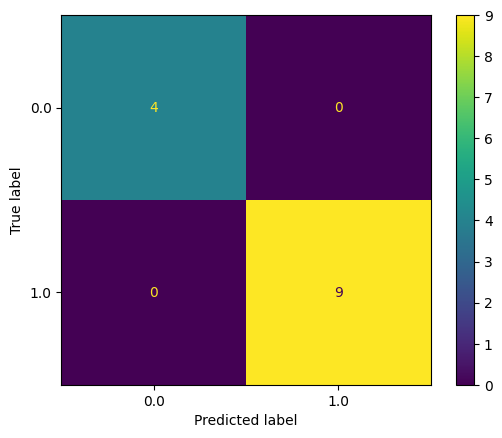

In [ ]:
get_accuracy(santander_headings, 'H_length', 'N_length')

Accuracy: 0.8462
Precision: 0.6667
Recall: 0.6667


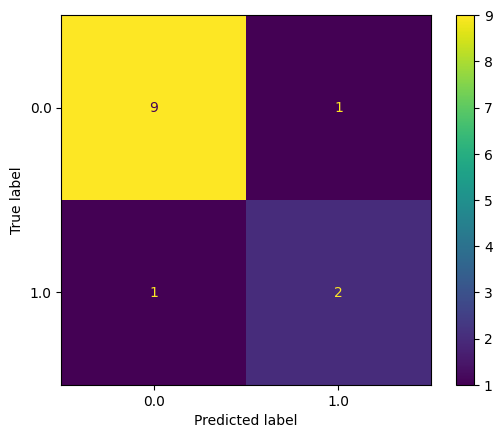

In [ ]:
# measure accuracy for language- grammar
get_accuracy(santander_headings, 'H_grammar', 'L_grammar')

In [ ]:
# examine incorrect label
santander_headings[santander_headings['H_grammar'] != santander_headings['L_grammar']][['header', 'L_grammar_notes']]

,header,L_grammar_notes
4,What checks do you need to do for me to get a ...,"This header seems to be a question, but it's m..."
12,Your Right to Cancel (and repay early),NaN


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 1.0
Precision: 0.0
Recall: 0.0


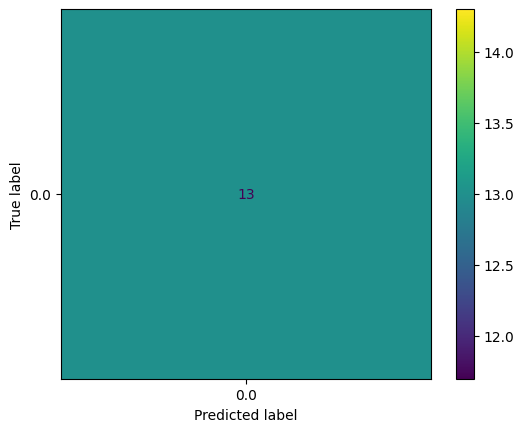

In [ ]:
# measure accuracy for language- passive
get_accuracy(santander_headings, 'H_passive', 'N_passive')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


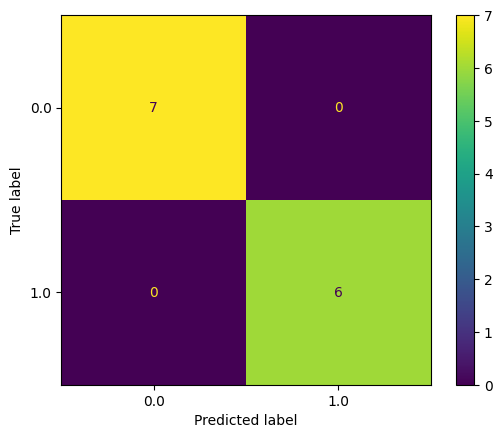

In [ ]:
# measure subheadings
get_accuracy(santander_headings, 'H_subheadings', 'L_subheadings')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 1.0
Precision: 0.0
Recall: 0.0


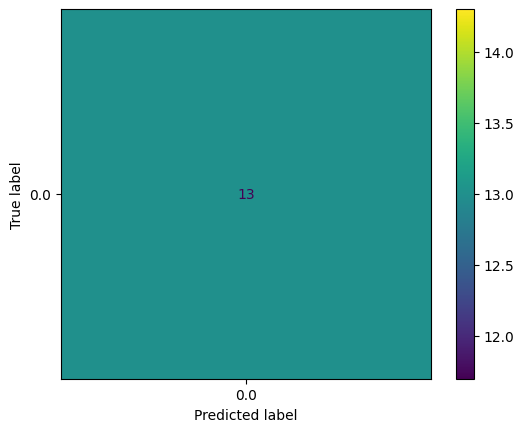

In [ ]:
# measure design
get_accuracy(santander_headings, 'H_design', 'L_design')

## Compile Scores

In [ ]:
# sum up all columns
santander_headings['sum_of_columns'] = santander_headings[['N_length', 'L_grammar', 'N_passive', 'L_subheadings', 'L_design']].sum(axis=1)
santander_content['sum_of_columns'] = santander_content[['L_relevance', 'N_keywords']].sum(axis=1)

In [ ]:
print("Errors:", santander_headings['sum_of_columns'].sum())
print("Total:", (santander_headings['sum_of_columns'].count()*5))

Errors: 18.0
Total: 65


In [ ]:
print(18/65)

0.27692307692307694


In [ ]:
# find proportion
print("Errors:", santander_headings['sum_of_columns'].sum())
print("Total:", (santander_content['sum_of_columns'].count()*2))

Errors: 18.0
Total: 24


In [ ]:
print(18/24)

0.75
